In [ ]:
import numpy as np
import pandas as pd

<hr style="border: 20px solid black">

In [ ]:
rng = np.random.default_rng(seed = 0) 

<h3>Uniform Distribution</h3>
<br>
<font size="+1">
    <ul>
        <li>Simulate $100,000$ samples from a uniform distribution between $1$ and $3$.</li>
        <br>
        <li>Plot the histogram with $20$ bins.</li>
        <br>
    </ul>
</font>

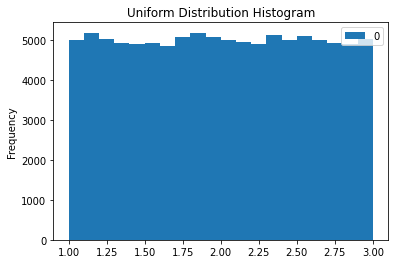

In [ ]:
s = pd.DataFrame(rng.uniform(low = 1, high = 3, size = 100000))
import matplotlib.pyplot as plt
s.plot(kind='hist', bins =20, title='Uniform Distribution Histogram')

<h3>Geometric Distribution</h3>
<br>
<font size="+1">
    <ul>
        <li>Simulate $100,000$ samples from a geometric distribution with parameter $p = 0.3$.</li>
        <br>
        <li>Plot the histogram with $30$ bins.</li>
        <br>
    </ul>
</font>

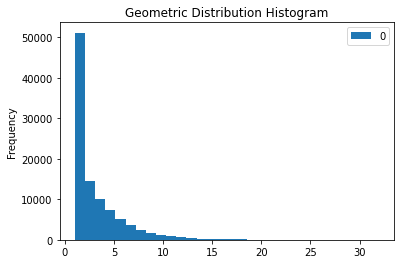

In [ ]:
g = pd.DataFrame(rng.geometric(p=0.3, size = 100000))
g.plot(kind='hist', bins =30, title='Geometric Distribution Histogram')

<h3>Poisson Distribution</h3>
<br>
<font size="+1">
    <ul>
        <li>Assume customers are arriving at a grocery store according to some probability distribution over any given $10$ minute interval.</li>
        <br>
        <li>Further, assume the number of customers arriving in a $10$ minute interval is distributed according to a Poisson distribution with intesity rate of $\lambda = 8.5$.</li>
        <br>
        <li>Estimate the chance that the number of arrivals in a given $10$ minute interval is $15$ or higher.</li>
        <br>
        <li style="color:red">Hint: Generate $1,000,000$ samples from a Poisson distribution with parameter $\lambda = 8.5$ and count the <i>proportion</i> (use the mean function) of samples that are at least 15.</li>
        <br>
    </ul>
</font>

sample    0.027517
dtype: float64


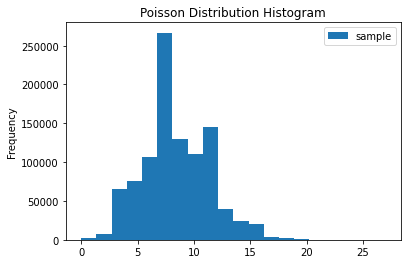

In [ ]:
poisson = pd.DataFrame(rng.poisson(lam=8.5, size=1000000), columns=['sample'])
poisson.plot(kind='hist', bins =20, title='Poisson Distribution Histogram')

probability = (poisson>= 15).sum() /len(poisson)
print(probability)

<h3>Normal Distribution</h3>
<br>
<font size="+1">
    <ul>
        <li>Suppose there are two products, and a customer's willingness to pay for each of the two products are drawn independently from the following distributions:</li>
        <br>
        <ul>
            <li>Product 1: $Normal(25, \ 10)$</li>
            <br>
            <li>Product 2: $Normal(20, \ 15)$</li>
            <br>
        </ul>
        <li>Estimate the proportion of customers whose willingness to pay is higher for the second product than the first product, <b>and</b> whose willingness to pay for the second product is at least zero.</li>
        <br>
        <li style="color:red">Hint: Generate $1,000,000$ samples from each distribution and compare the two series using vectorized operations.</li>
        <br>
    </ul>
</font>

In [ ]:
p1 = pd.DataFrame(rng.normal(loc=25, scale=10, size=1000000), columns=['sample'])
p2 = pd.DataFrame(rng.normal(loc=20, scale=15, size=1000000), columns=['sample'])


In [ ]:
probability = ((p2 >=0) & (p2 > p1)).sum()/ len(p2)
probability

sample    0.390222
dtype: float64

<h2>Sampling from Complex Distributions with Algorithmic Thinking and Numpy</h2>

<h3>Mixture of Distributions</h3>
<br>
<font size="+1">
    <ul>
        <li>Suppose there are two market segments, <i>A</i> and <i>B</i>, and the willingness to pay for a product depends on the segment.</li>
        <br>
        <ul>
            <li>Segment A: $Normal(150, \ 50)$</li>
            <br>
            <li>Segment B: $Normal(50, \ 20)$</li>
            <br>
        </ul>
        <li>Moreover, each customer has a $0.2$ chance of being in segment A and $0.8$ chance of being in segment B.</li>
        <br>
        <li>Generate a simulated data set of the willingness to pay for $10,000$ customers and plot its histogram.</li>
        <br>
        <li style="color:red">To generate a general mixture of simple distributions, you must first sample from the customer distribution, and then depending on the segment of the customer, sample from the willingness to pay distribution. You then repeat this logic for however many samples you wish to simulate.</li>
        <br>
    </ul>
</font>

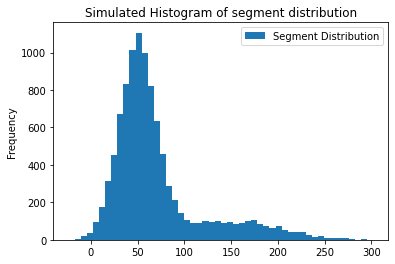

In [ ]:
rng = np.random.default_rng(seed=42)

simulated_segment = []
for customers in range(10_000):
    segment = rng.choice(['A', 'B'], p=[0.2, 0.8])
    
    if segment == 'A':
        simulated_segment.append(rng.normal(150,50))
    else:
        simulated_segment.append(rng.normal(50,20))
        
simulated_segment = pd.DataFrame(simulated_segment, columns=['Segment Distribution'])

simulated_segment.plot(kind='hist', bins=50, title='Simulated Histogram of segment distribution')



<h3>Serial Correlation</h3>
<br>
<font size="+1">
    <ul>
        <li>Suppose you want to simulate whether it will rain for $60$ days. Assume you have estimated that the overall proportion of rainy days is $0.2$.</li>
        <br>
        <li>First, simulate a time series of $60$ days by sampling from a variable with two outcomes, rain or no-rain, and plot the resulting data.</li>
        <br>
        <ul>
            <li>Use the configuration <i>simulated_data.plot(style='ro', figsize=(10,3))</i> to display a visually appealing graph.</li>
            <br>
        </ul>
        <li style="color:red">Hint: Generate $60$ samples from a binomial distribution with $n=1$ and the appropriate probability.</li>
        <br>
        <li>Second, to make a more realistic simulation, you want to account for the dependence of the weather on given day on the weather from previous days.</li>
        <br>
        <ul>
            <li>Specifically, assume the chance of rain occurring on a given day is</li>
            <br>
            <ul>
                <li>$0.6$ if it rained yesterday</li>
                <br>
                <li>$0.1$ if it did not rain yesterday</li>
                <br>
            </ul>
            <li>Simulate a time series of weather with the assumed conditional distribution and plot the resulting data.</li>
            <br>
            <li>Use the configuration <i>simulated_data.plot(style='ro', figsize=(10,3))</i> to display a visually appealing graph.</li>
            <br>
        </ul>
        <li style="color:red">Hint: Generate $1$ sample from the unconditional binomial distribution, then generate $59$ samples from a binomial distribution with parameters depending on the outcome of the previous observation.</li>
        <br>
    </ul>
</font>

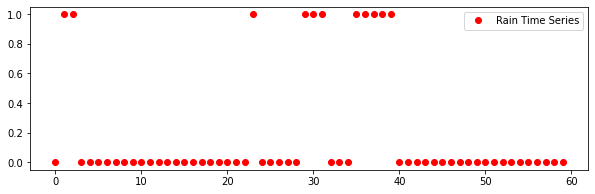

In [ ]:
rng = np.random.default_rng(seed=1)

simulated_data = [rng.binomial(1,0.2)]
for t in range(1, 60):
    if simulated_data[t-1] == 1:
        simulated_data.append(rng.binomial(1,0.6))
    else:
        simulated_data.append(rng.binomial(1,0.1))
        
simulated_data = pd.DataFrame(simulated_data, columns=['Rain Time Series'])
simulated_data.plot(style='ro', figsize=(10,3))

<h3>Accounting for Uncertain Product Quality When Forecasting Demand</h3>
<br>
<font size="+1">
    <ul>
        <li>Suppose you want to forecast demand for a new product.</li>
        <br>
        <li>Based on past data and your domain-specific knowledge of the product, you estimate that the product quality will be</li>
        <br>
        <ul>
            <li><i>Great</i> with probability $0.1$</li>
            <br>
            <li><i>Average</i> with probability $0.5$</li>
            <br>
            <li><i>Bad</i> with probability $0.4$</li>
            <br>
        </ul>
        <li>You then model demand as a random variable that is normally distributed with a mean and standard deviation that depends on the product quality as follows</li>
        <br>
        <ul>
            <li>$(\mu, \sigma) = (10000, 2000)$ if product quality is <i>Great</i></li>
            <br>
            <li>$(\mu, \sigma) = (5000, 1000)$ if product quality is <i>Average</i></li>
            <br>
            <li>$(\mu, \sigma) = (1000, 300)$ if product quality is <i>Bad</i></li>
            <br>
        </ul>
        <li>Create a series called <i>forecast</i> with $10,000$ samples of the demand forecast, and compute the mean and standard deviation of the samples, as well as the probability that demand is more than $6000$.</li>
        <br>
        <li>Finally, plot a histogram of the samples with $100$ bins.</li>
        <br>
        <li>Note, you can ignore the constraint that demand should be a non-negative integer.</li>
        <br>
    </ul>
</font>

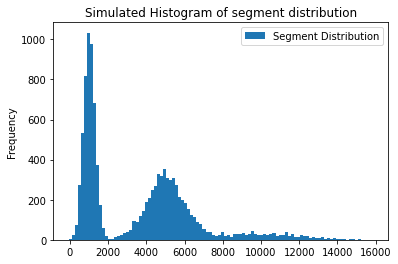

In [ ]:
rng = np.random.default_rng(seed=42)

simulated_segment = []
for customers in range(10_000):
    segment = rng.choice(['Great', 'Average', 'Bad'], p=[0.1, 0.5, 0.4])
    
    if segment == 'Great':
        simulated_segment.append(rng.normal(10000,2000))
    if segment == 'Average':
        simulated_segment.append(rng.normal(5000,1000))
    else:
        simulated_segment.append(rng.normal(1000,300))
simulated_segment = pd.DataFrame(simulated_segment, columns=['Segment Distribution'])

simulated_segment.plot(kind='hist', bins=100, title='Simulated Histogram of segment distribution')

In [ ]:
#mean
simulated_segment.mean()

Segment Distribution    3611.533268
dtype: float64

In [ ]:
#standard deviation
simulated_segment.std()

Segment Distribution    2903.12132
dtype: float64

In [ ]:
#prob that the demand is >6000
(simulated_segment>6000).sum()/len(simulated_segment)

Segment Distribution    0.160805
dtype: float64

<h3>Simulating Serially Correlated Demand</h3>
<br>
<font size="+1">
    <ul>
        <li>Suppose a logistics company would like to simulate demand for a given product.</li>
        <br>
        <li>Assume that there are <i>Good</i> and <i>Bad</i> weeks.</li>
        <br>
        <ul>
            <li>On a good week, the demand is normally distributed with mean $200$ and standard deviation $50$</li>
            <br>
            <li>On a bad week, the demand is normally distributed with mean $100$ and standard deviation $30$</li>
            <br>
            <li>As a practical constraint, you should round the decimal part of demand to the nearest integer and set it to zero if it is ever negative.</li>
        <br>
        </ul>
        <li>Additionally, we should assume that a week being <i>good</i> or <i>bad</i> is serially correlated across time.</li>
        <br>
        <ul>
            <li>Conditional on a given week being <i>Good</i>, the next week remains <i>Good</i>  with probability $0.9$.</li>
            <br>
            <li>Similarly, conditional on a given week being <i>Bad</i>, the next week remains <i>Bad</i>  with probability $0.9$.</li>
            <br>
        </ul>
        <li>You are to simulate a time series of demand for $100$ weeks, assuming the first week starts <i>Good</i>. Also, plot the demand over time.</li>
        <br>
    </ul>
</font>

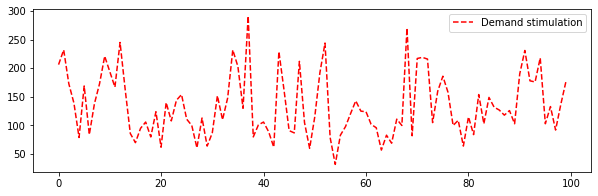

In [ ]:
rng = np.random.default_rng(seed=0)

simulated_demand = [rng.normal(200,50)]
simulated_week = [1]

for t in range(1, 100):
    if simulated_week[t-1] == 1:
      simulated_week.append(rng.binomial(1,0.9))
    else:
      simulated_week.append(rng.binomial(1,0.1))
    
    if simulated_week[t] == 1:
      demand = rng.normal(200,50)
      if demand < 0:
        demand = 0
      else: 
        demand = round(demand)
    else:
      demand = rng.normal(100,30)
      if demand < 0:
        demand = 0
      else:
        demand = round(demand)
    simulated_demand.append(demand)
      
simulated_demand = pd.DataFrame(simulated_demand, columns=['Demand stimulation'])

simulated_demand.plot(style='r--', figsize=(10,3))

<h3>Forecasting Bonus Earnings</h3>
<br>
<font size="+1">
    <ul>
        <li>Assume you are a salesperson for cars and your pay is tied to an incentive scheme.</li>
        <br>
        <ul>
            <li>For each month, there is a <i>target profit</i> of $80,000$ that the car dealership sets.</li>
            <br>
            <li>If you make more profit, above the target profit, for the dealership that month, then you receive a $20\%$ bonus on the amount of profit over the target</li>
            <br>
            <li>However, if you do not meet the target, then you receive no bonus.</li>
            <br>
        </ul>
        <li>As an example, consider the following:</li>
        <br>
        <ul>
            <li>If you make $\$100,000$ of profit, then you receive $\$4,000 = (100,000 - 80,000)\times 0.2$ in bonus.</li>
            <br>
            <li>However, if you make $\$70,000$, then you receive no bonus.</li>
            <br>
        </ul>
        <li>You would like to understand the distribution of outcomes for your monthly bonus.</li>
        <br>
        <ul>
            <li>You estimate that the number of cars you sell is binomially distributed with $n=200$ and $p=0.2$.</li>
            <br>
            <li>On every car you sell, the amount of profit you make for the dealership is normally distributed with $\mu=3000$ and $\sigma=1000$, and the profit from each car is independent from eachother.</li>
            <br>
            <li>This means that the profit for two different cars should be two independent draws from the normal distribution.</li>
            <br>
        </ul>
        <li>You are to create a series called <i>monthly_bonus</i> with $100,000$ samples of your monthly bonus.</li>
        <br>
        <ul>
            <li>Additionally, print the mean and standard deviation rounded to the nearest integer, as well as the probability that the bonus is less than $\$5,000$ (round the probability to three decimal places).</li>
            <br>
            <li>Finally, plot a histogram (use $100$ bins) of the distribution of your monthly bonus.</li>
            <br>
        </ul>
    </ul>
</font>

In [ ]:
rng = np.random.default_rng(seed=0)

bonus = []
for t in range (100_000):
  total_profit = 0 
  cars_num = rng.binomial(n=200,p=0.2)

  for i in range(cars_num):
    profit = rng.normal(3000,1000)
    total_profit += profit
    
  if total_profit >= 80000:
    bonus.append((total_profit - 80000)*0.2)
  else: 
    bonus.append(0)
  
monthly_bonus = pd.DataFrame(bonus, columns = ['Stimulated Monthly Bonus'])
monthly_bonus


,Stimulated Monthly Bonus
0,8497.956120
1,3075.097337
2,5816.761646
3,7320.993946
4,6527.230341
...,...
99995,10644.995743
99996,11929.415496
99997,10877.417393
99998,2662.522010


In [ ]:
round(monthly_bonus.mean())

Stimulated Monthly Bonus    8001.0
dtype: float64

In [ ]:
round(monthly_bonus.std())

Stimulated Monthly Bonus    3598.0
dtype: float64

In [ ]:
round((monthly_bonus < 5000).sum()/len(monthly_bonus), 3)

Stimulated Monthly Bonus    0.206
dtype: float64

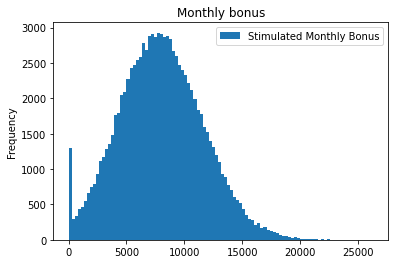

In [ ]:
monthly_bonus.plot(kind='hist', bins=100, title='Monthly bonus')

<h3>Simulating Demand Under Price Promotions</h3>
<br>
<font size="+1">
    <ul>
        <li>Suppose a grocery store offers promotions on a certain product with probability $0.3$ every month, independent from other months.</li>
        <br>
        <li>Assume that the distribution of the monthly demand for the product is independent and normally distributed with the following parameters:</li>
        <br>
        <ul>
            <li>on a month without promotions, the demand is normally distributed with mean $500$ and standard deviation $100$</li>
            <br>
            <li>on a month with promotions, the demand is normally distributed with mean $800+100t$ and standard deviation $150$, where $t$ is the number of months without a promotion since the last promotion</li>
            <br>
            <li>For example, if the last month had a promotion, then $t=0$. If neither of the last two months had a promotion but the month before had one, then $t=2$.</li>
            <br>
            <li>You can ignore the practical constraint of rounding the decimal part of demand to the nearest integer and set it to zero if it is ever negative.</li>
            <br>
        </ul>
        <li>Write a function called <i>simulate_demand()</i> with one input argument:</li>
        <br>
        <ul>
            <li><b>num_months</b>, which is a positive integer representing the number of months to simulate.</li>
            <br>
        </ul>
        <li>The function should return a list of <b>num_months</b>-many numbers corresponding to consecutive months of simulated demand for the product.</li>
        <br>
        <li>Assume that prior to the simulated months there was a promotion, so $t=0$ initially.</li>
        <br>
    </ul>
</font>

In [ ]:
rng = np.random.default_rng(seed=0)
def simulate_demand(num_months):
  simulated_promotion = []
  for i in range(num_months):
    promotion = rng.choice(['Yes', 'No'], p=[0.3, 0.7])
    t=0
    if promotion[t-1]== 'Yes':
      t=0 
    else: 
      t +=1

    if promotion == 'No':
        simulated_promotion.append(rng.normal(500,100))
    else:
        simulated_promotion.append(rng.normal(800+100*t,150)) 

  return simulated_promotion

simulate_demand(10)
  


[486.78951367086984,
 915.7350175729559,
 536.1595054909485,
 594.7080963129242,
 373.45785289539475,
 504.13259793472434,
 478.1208336067454,
 426.77326452965485,
 468.36998436308454,
 1056.3770054164015]